In [29]:
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [30]:
df_original = pd.read_csv('NVL Historical Data.csv')

In [31]:
df = df_original[::-1].reset_index()[['Price']]
df['Price'] = df['Price'].str.replace(',', '')

In [32]:
df

,Price
0,14450
1,14150
2,14150
3,14500
4,14500
...,...
1843,25182
1844,25140
1845,25097
1846,25225


In [33]:
train82 = df[:int(0.8*len(df))]
test82 = df[int(0.8*len(df)):]

train73 = df[:int(0.7*len(df))]
test73 = df[int(0.7*len(df)):]

train91 = df[:int(0.9*len(df))]
test91 = df[int(0.9*len(df)):]

In [34]:
train82

,Price
0,14450
1,14150
2,14150
3,14500
4,14500
...,...
1473,28427
1474,28928
1475,27815
1476,27871


In [35]:
X_train82 = np.array(train82.index).reshape(-1, 1)
y_train82 = train82['Price']
X_test82 = np.array(test82.index).reshape(-1, 1)
y_test82 = test82['Price']

X_train73 = np.array(train73.index).reshape(-1, 1)
y_train73 = train73['Price']
X_test73 = np.array(test73.index).reshape(-1, 1) 
y_test73 = test73['Price']

X_train91 = np.array(train91.index).reshape(-1, 1)
y_train91 = train91['Price']
X_test91 = np.array(test91.index).reshape(-1, 1)
y_test91 = test91['Price']

In [36]:
X_test82

array([[1478],
       [1479],
       [1480],
       [1481],
       [1482],
       [1483],
       [1484],
       [1485],
       [1486],
       [1487],
       [1488],
       [1489],
       [1490],
       [1491],
       [1492],
       [1493],
       [1494],
       [1495],
       [1496],
       [1497],
       [1498],
       [1499],
       [1500],
       [1501],
       [1502],
       [1503],
       [1504],
       [1505],
       [1506],
       [1507],
       [1508],
       [1509],
       [1510],
       [1511],
       [1512],
       [1513],
       [1514],
       [1515],
       [1516],
       [1517],
       [1518],
       [1519],
       [1520],
       [1521],
       [1522],
       [1523],
       [1524],
       [1525],
       [1526],
       [1527],
       [1528],
       [1529],
       [1530],
       [1531],
       [1532],
       [1533],
       [1534],
       [1535],
       [1536],
       [1537],
       [1538],
       [1539],
       [1540],
       [1541],
       [1542],
       [1543],
       [15

In [37]:
y_test82

1478    28427
1479    28372
1480    28205
1481    28149
1482    28093
        ...  
1843    25182
1844    25140
1845    25097
1846    25225
1847    25055
Name: Price, Length: 370, dtype: object

In [38]:
model82 = LinearRegression().fit(X_train82, y_train82)
model82.intercept_, model82.coef_

(38982.76194462666, array([3.61969582]))

In [39]:
model73 = LinearRegression().fit(X_train73, y_train73)
model73.intercept_, model73.coef_

(35850.083698813374, array([10.46929499]))

In [40]:
model91 = LinearRegression().fit(X_train91, y_train91)
model91.intercept_, model91.coef_

(41622.98844477081, array([-1.42975252]))

In [41]:
y_pred82 = model82.predict(X_test82)
y_pred73 = model73.predict(X_test73)
y_pred91 = model91.predict(X_test91)

In [42]:
last_index =  df.index[-1]

In [43]:
last30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_forecast82_next_30_days = model82.predict(x_next_30_days)
y_forecast73_next_30_days = model73.predict(x_next_30_days)
y_forecast91_next_30_days = model91.predict(x_next_30_days)

In [44]:
last60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_forecast82_next_60_days = model82.predict(x_next_60_days)
y_forecast73_next_60_days = model73.predict(x_next_60_days)
y_forecast91_next_60_days = model91.predict(x_next_60_days)

In [45]:
last90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_forecast82_next_90_days = model82.predict(x_next_90_days)
y_forecast73_next_90_days = model73.predict(x_next_90_days)
y_forecast91_next_90_days = model91.predict(x_next_90_days)

In [46]:
print(y_test82)

1478    28427
1479    28372
1480    28205
1481    28149
1482    28093
        ...  
1843    25182
1844    25140
1845    25097
1846    25225
1847    25055
Name: Price, Length: 370, dtype: object


In [47]:
rmse = np.sqrt(mean_squared_error(y_test82, y_pred82))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test82, y_pred82)
print("MAE:", mae)
y_test82_arr = np.array(y_test82).astype(float)
mape = np.mean(np.abs((y_test82_arr - y_pred82) / y_test82_arr)) * 100
print("MAPE:", mape)

RMSE: 16224.062942218014
MAE: 15716.722460411436
MAPE: 56.046461250016044


In [48]:
rmse = np.sqrt(mean_squared_error(y_test73, y_pred73))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test73, y_pred73)
print("MAE:", mae)
y_test73_arr = np.array(y_test73).astype(float)
mape = np.mean(np.abs((y_test73_arr - y_pred73) / y_test73_arr)) * 100
print("MAPE:", mape)

RMSE: 21874.21750845923
MAE: 21109.397547776265
MAPE: 71.5898092733242


In [49]:
rmse = np.sqrt(mean_squared_error(y_test91, y_pred91))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test91, y_pred91)
print("MAE:", mae)
y_test91_arr = np.array(y_test91).astype(float)
mape = np.mean(np.abs((y_test91_arr - y_pred91) / y_test91_arr)) * 100
print("MAPE:", mape)

RMSE: 11367.793239523016
MAE: 11225.924124306612
MAPE: 40.84678187477636


In [50]:
y_train82

0       14450
1       14150
2       14150
3       14500
4       14500
        ...  
1473    28427
1474    28928
1475    27815
1476    27871
1477    27815
Name: Price, Length: 1478, dtype: object

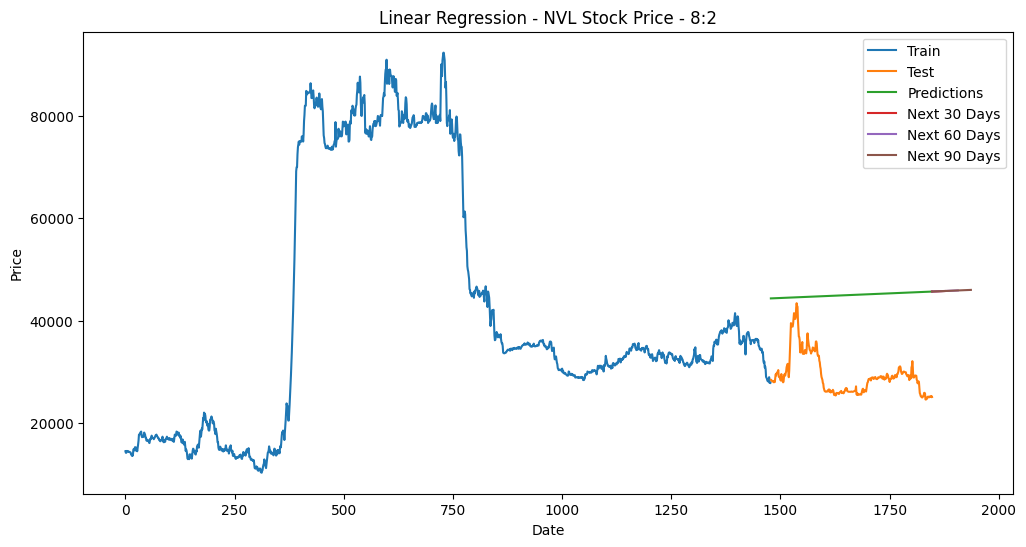

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(train82.index, np.array(train82['Price']).astype(float))
plt.plot(test82.index, np.array(test82['Price']).astype(float))
plt.plot(test82.index, y_pred82)
plt.plot(last30_data, y_forecast82_next_30_days)
plt.plot(last60_data, y_forecast82_next_60_days)
plt.plot(last90_data, y_forecast82_next_90_days)
plt.title('Linear Regression - NVL Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days', 'Next 60 Days', 'Next 90 Days'])
plt.show()

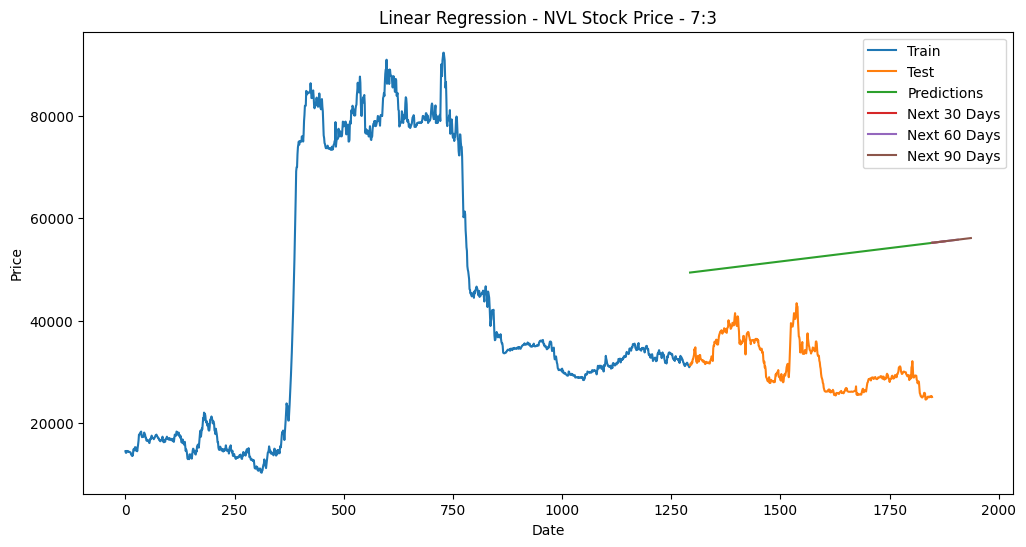

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(train73.index, np.array(train73['Price']).astype(float))
plt.plot(test73.index, np.array(test73['Price']).astype(float))
plt.plot(test73.index, y_pred73)
plt.plot(last30_data, y_forecast73_next_30_days)
plt.plot(last60_data, y_forecast73_next_60_days)
plt.plot(last90_data, y_forecast73_next_90_days)
plt.title('Linear Regression - NVL Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days', 'Next 60 Days', 'Next 90 Days'])
plt.show()

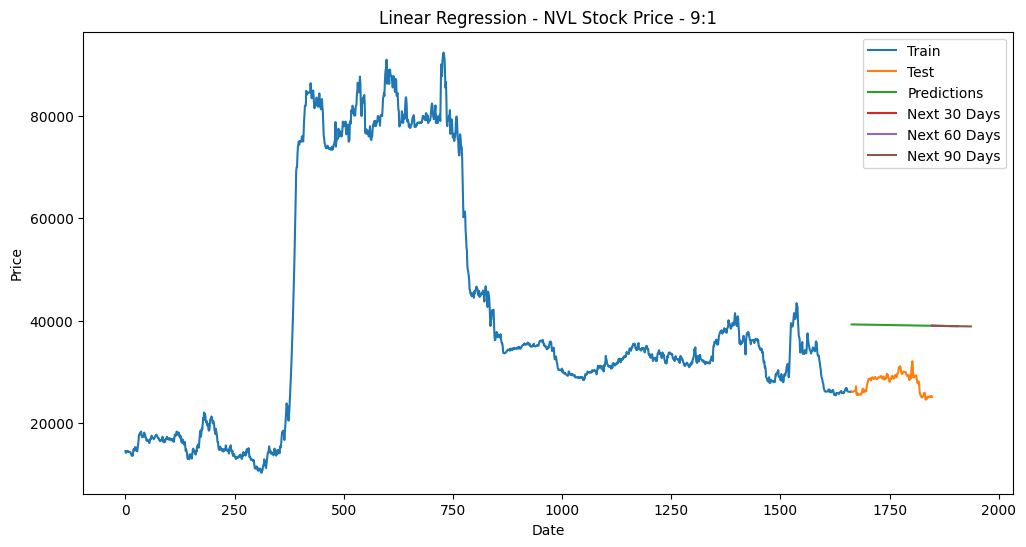

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(train91.index, np.array(train91['Price']).astype(float))
plt.plot(test91.index, np.array(test91['Price']).astype(float))
plt.plot(test91.index, y_pred91)
plt.plot(last30_data, y_forecast91_next_30_days)
plt.plot(last60_data, y_forecast91_next_60_days)
plt.plot(last90_data, y_forecast91_next_90_days)
plt.title('Linear Regression - NVL Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days', 'Next 60 Days', 'Next 90 Days'])
plt.show()